<a href="https://colab.research.google.com/github/Umnica/chislak1/blob/main/%D0%92%D1%82%D0%BE%D1%80%D1%86%D0%B5%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Нужно:
Cмоделировать выборку дискретной случайной величины, распределенной по закону Пуассона:

image.png

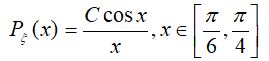

#Алгоритм:

1. Задаем параметры
2. Делаем интервалы;

3. Генерируем равномерное распределение с параметрами (0, 1) .
4.Если α принадлежит некоторому интервалу, то в конечную выборку добавляем значение индекс этого интервала;
5. Снова повторяем пункт 3, пока не получим N элементов выборки;

#Проверка принадлежности полученной выбори распределению Пуассона.

Для этого нужно проверить:
1. близость мат. ожидания
2. выборочного среднего 
3. теореиической дисперсии
4. выборочной диспрерсии

##выполнить проверку с использованием критерия Пирсона.

В первом задании используется стандартный метод моделирования дискретных случайных величин.

Во втором – один из двух  методов моделирования непрерывных случайных величин.

Метод исключения (если дана плотность).


In [75]:
import random
import numpy as np
import math

In [76]:
def p_k(k, a):
    return a**k/((1 + a)**(k+1))

In [120]:
N = 1000
a = 10
k = 0

array_random_alp = np.zeros(N)
array_memorize_chi = np.arange(N)

<ipython-input-76-3dd889491854>:2: RuntimeWarning: overflow encountered in power
  return a**k/((1 + a)**(k+1))
<ipython-input-76-3dd889491854>:2: RuntimeWarning: invalid value encountered in true_divide
  return a**k/((1 + a)**(k+1))


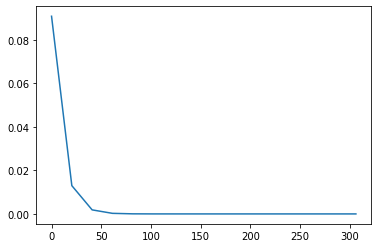

In [121]:
import matplotlib.pyplot as plt

k = np.linspace(0, N)
plt.plot(k, p_k(k,a))
plt.show()

Математическое ожидание

In [122]:
eps = 0.00001
E = 0
k = 1
while(k*p_k(k, a) > eps):
    E += k * p_k(k, a)
    k += 1

print("Мат ожидание", E)

Мат ожидание 9.999891884730374


Дисперсия

In [123]:
E2 = 0
k = 1
while(k * k * p_k(k, a) > eps):
    E2 += k * k * p_k(k, a)
    k += 1
D =  E2 - E*E
print("Дисперсия", D)

Дисперсия 110.0020452795113


In [124]:
for i in range(N):
    alp = random.random()
    array_random_alp[i] = alp

Закон Пуассона

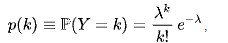


In [125]:
lam = E
def p_puason(k, lam):
    return lam**k * math.exp(-lam) / math.factorial(k)

распределение пуассона с параметром λ = E




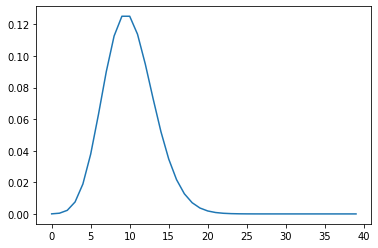

In [126]:
k = range(0, 40)
p_puas = [p_puason(i, lam) for i in k] 
plt.plot(k, p_puas)
plt.show()

Равномерное распределение 

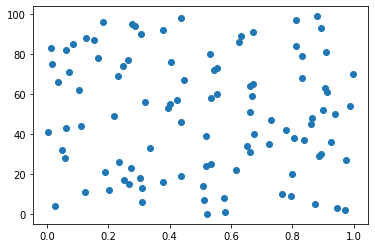

In [127]:
k = range(0, 100)
array_random_alp = [random.random() for i in k]
plt.scatter(array_random_alp, k)
plt.show()

Интервалы

In [128]:
P_L = 0.0 # левая/ правая граница 
P_R = 0.0
k = 0
arr_random = [] # список со сгенерированными числами
final_sample = [] # конечная выборка
for i in range(N):
    alp = random.random()
    arr_random.append(alp)
    while (True):
        P_R += p_k(k, a)
        if (P_L <= alp < P_R):
            final_sample.append(k)
            k = 0
            P_L = 0
            P_R = 0
            break
        P_L = P_R
        k += 1

print("список со сгенерированными числами:", *arr_random)
print("cмоделированная конечная выборка:", *array_memorize_chi)
sample_mean = sum(final_sample)/N
sample_variance = sum([i**2 for i in final_sample])/N

print("выборочное среднее:", sample_mean)
print("выборочная дисперсия:", sample_variance)

список со сгенерированными числами: 0.11756078769027845 0.6836978051068024 0.22633994005897462 0.684640843549945 0.5027958802251408 0.4664460572206097 0.7539910165233222 0.09807865493536871 0.9009094222677582 0.5224039077683542 0.21344668357874386 0.19225845032224953 0.6386785268876056 0.39321385578384827 0.7915552951310227 0.06569086928518786 0.7841498480674826 0.96411762323666 0.7053988281379734 0.49230343997836157 0.540553772642372 0.9988825219246674 0.5693505663475071 0.13475945059277716 0.7246269119492731 0.15712623452315355 0.6098011174528928 0.8489244622407632 0.5591346908578972 0.6752318646084452 0.9745304266549061 0.633284580553884 0.4026555029804999 0.47848461214331073 0.18033705251183063 0.09780701514882217 0.09198432962701564 0.9706113362386822 0.5070723430096578 0.6359387751247237 0.1806949647161049 0.20832857752176992 0.06711008068479751 0.9661087056920893 0.6671874529055857 0.7816395275557398 0.39336376964313235 0.06925107191643665 0.1337179624326007 0.13669789800016363 

In [142]:
array_set = sorted(set(final_sample))
print("встретившиеся интервалы", array_set)

встретившиеся интервалы [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 54, 56, 58, 60, 71, 86]


In [140]:
array_including = {}
for x in final_sample:
    array_including[x] = array_including.get(x, 0) + 1
print("Колличество интервалов: ", array_including)

Колличество интервалов:  {1: 91, 12: 35, 2: 90, 7: 43, 6: 52, 14: 24, 24: 12, 10: 38, 5: 56, 16: 25, 0: 84, 34: 2, 8: 44, 71: 2, 13: 26, 9: 51, 19: 12, 11: 30, 38: 4, 37: 1, 35: 3, 15: 20, 17: 17, 22: 16, 30: 4, 25: 6, 3: 57, 36: 3, 18: 17, 32: 8, 50: 1, 4: 49, 33: 5, 20: 7, 29: 5, 28: 8, 27: 10, 23: 7, 31: 6, 54: 1, 60: 1, 26: 7, 43: 2, 21: 5, 45: 1, 49: 3, 47: 1, 41: 1, 86: 1, 58: 1, 48: 1, 56: 1, 46: 1, 40: 1, 39: 1}


image.png

In [141]:
print("Степени свободы:", array_set[-1]-2)
chiSquad = 0

i = 0
for number in array_set:
        chiSquad += ((array_including[number] - N*p_k(number, a))**2)/(N*p_k(number, a))

print("Критерий хи квадрат: ", chiSquad)


Степени свободы: 84
Критерий хи квадрат:  121.38203882080074


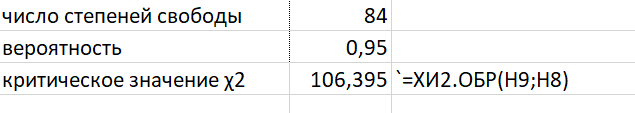

#2 Задание

In [207]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

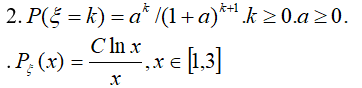

In [237]:
def p_csi(x, c):
    return c*math.cos(x)/x

In [236]:
a = math.pi/6
b = math.pi/4

численно находим значение интегралла для С

In [238]:
def fu_for_C():
    n = 10000
    h = (b-a)/n
    f_s = 0
    x = a
    for i in range(n):
        f_s += p_csi(x, 1)
        x += h
    return f_s*h
c = 1/(fu_for_C())
c

3.0966190341194895

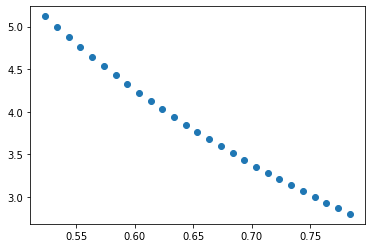

In [266]:
x = np.arange(a, b, 0.01)
p = [p_csi(i, c) for i in x]
plt.scatter(x, p)
plt.show()

находим значение интегралла для мат ожидания

In [240]:
def fu_for_E(с):
    n = 10000
    h = (b-a)/n
    f_s = 0
    x = a
    for i in range(n):
        f_s += p_csi(x, c) * x
        x += h
    return f_s*h
print('Теоретическое среднее:', fu_for_E(c))

Теоретическое среднее: 0.641337242391227


находим значение интегралла для дисперсии

In [241]:
def fu_for_D(с):
    n = 10000
    h = (b-a)/n
    f_s = 0
    x = a
    for i in range(n):
        f_s += p_csi(x, c)*x*x
        x += h
    return f_s*h
print('Теоретическая дисперсия:', fu_for_D(c) - (fu_for_E(c)**2))

Теоретическая дисперсия: 0.005618495625580644


In [242]:
p

[1.6731104045299319,
 1.2769221667356525,
 0.9350699330610528,
 0.6371861264027412,
 0.37594534991413725,
 0.14603077673637085,
 -0.05651237284085551,
 -0.23469547851589617,
 -0.39086573945468545,
 -0.5268971717272485,
 -0.6443241075202475,
 -0.7444362175261903,
 -0.828347164224314,
 -0.897044786727177,
 -0.9514280896604644,
 -0.9923346275863769,
 -1.0205607783866169,
 -1.0368766678471149,
 -1.0420370123168519,
 -1.0367888053572263,
 -1.0218765362028042]

In [251]:
N = 10000
array_memorize_x = np.zeros(N)
i = 0
while i < N:
    csi = a + (b - a)*random.random()
    D = p_csi(a, c)
    eta = D*random.random()
    if eta < p_csi(csi, c):
        array_memorize_x[i] = csi
        i += 1
print(array_memorize_x)

[0.52428148 0.65094178 0.6241131  ... 0.68972665 0.63262221 0.73501567]


In [252]:
print('Выборочное среднее :', np.sum(array_memorize_x)/N)
print('Выборочная дисперсия :', ((array_memorize_x - array_memorize_x.sum()/N)**2).sum()/N)

Выборочное среднее : 0.6409353629714558
Выборочная дисперсия : 0.005527769750765449


In [253]:
K = int(1 + math.log(N, 2))
h = (array_memorize_x.max() - array_memorize_x.min())/K

print(K, h)

14 0.018699394361303395


In [254]:
pract_chast = []
teor_chast = []
eps = 1e-10

def F_csi(x, c):
    summma = 0
    next_number = 1
    iterator = 1
    while(abs(next_number)>1e-10):
        next_number = ((-1)**(iterator))*(x**(2*iterator))/math.factorial(2*iterator)/(2*iterator)
        summma += next_number
        iterator += 1
    return(c*(summma+math.log(abs(x),math.e)))

H = array_memorize_x.min()

for i in range(K):
    count = 0
    for j in array_memorize_x:
      if H - eps  < j < H + h + eps:
          count += 1
    pract_chast += [count]
    teor_chast += [N*(F_csi(H + h, c) - F_csi(H, c))]
    H += h

print(pract_chast)
print(teor_chast)

[901, 903, 852, 862, 755, 777, 745, 672, 696, 614, 600, 584, 516, 523]
[935.9237768964945, 894.0614062208718, 854.642363673337, 817.4372967400334, 782.2451900776439, 748.8891329535275, 717.2128232045604, 687.077662300608, 658.3603281227068, 630.9507362339417, 604.7503189753245, 579.6705660383328, 555.6317813020262, 532.5620194421288]


In [255]:
chi_2 = 0.0
for i in range(K):
    chi_2 += (teor_chast[i]-pract_chast[i]) ** 2 / teor_chast[i]

print('Колличество степеней свободы :', K - 1)
print('Критерий хи квадрат :', chi_2)


Колличество степеней свободы : 13
Критерий хи квадрат : 12.917099254899583
